In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import matplotlib

In [2]:
matplotlib.rcParams.update({"font.size": 14})

In [3]:
# Simulated data: Class A below y=0, Class B above y=0
np.random.seed(42)
class_A = np.random.randn(50, 2) + np.array([0, -2])
class_B = np.random.randn(50, 2) + np.array([0, 2])

X = np.vstack([class_A, class_B])
y = np.array([0] * 50 + [1] * 50)

In [4]:
# True decision boundary: horizontal through y=0
# Model: p(y=1) = sigmoid(b * y + c), with a = 0
true_a = 0.0
true_b = 2.5
true_c = 0.0


# Predictive function: p(y=1|x) = sigmoid(a*x1 + b*x2 + c)
def predict_proba(a, b, c, X_grid):
    return expit(a * X_grid[:, 0] + b * X_grid[:, 1] + c)

In [5]:
# Grid for contour plots
xx, yy = np.meshgrid(np.linspace(-6, 6, 200), np.linspace(-6, 6, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

In [6]:
show_legend = False

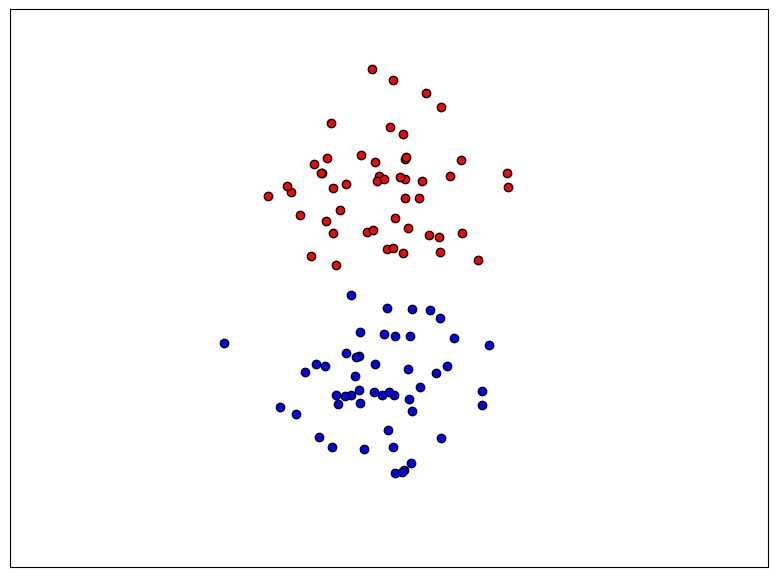

In [7]:
# --- Datapoints and Decision Boundary ---
probs_aleatoric = predict_proba(true_a, true_b, true_c, grid)

fig, ax = plt.subplots(figsize=(8, 6))
# c = ax.contourf(xx, yy, probs_aleatoric.reshape(xx.shape), levels=20, cmap='coolwarm', alpha=0.9)
# ax.contour(xx, yy, probs_aleatoric.reshape(xx.shape), levels=[0.5], colors='black', linewidths=2)

ax.scatter(class_A[:, 0], class_A[:, 1], c="blue", edgecolors="k", label="Class A")
ax.scatter(class_B[:, 0], class_B[:, 1], c="red", edgecolors="k", label="Class B")

if show_legend:
    ax.legend(loc="upper left")

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

ax.set_xticks([])
ax.set_yticks([])

# fig.colorbar(c, ax=ax, label='p(y=1)')
fig.tight_layout()

fig.savefig("../figures/uncertainty_types_explanation/datapoints.png", dpi=300)

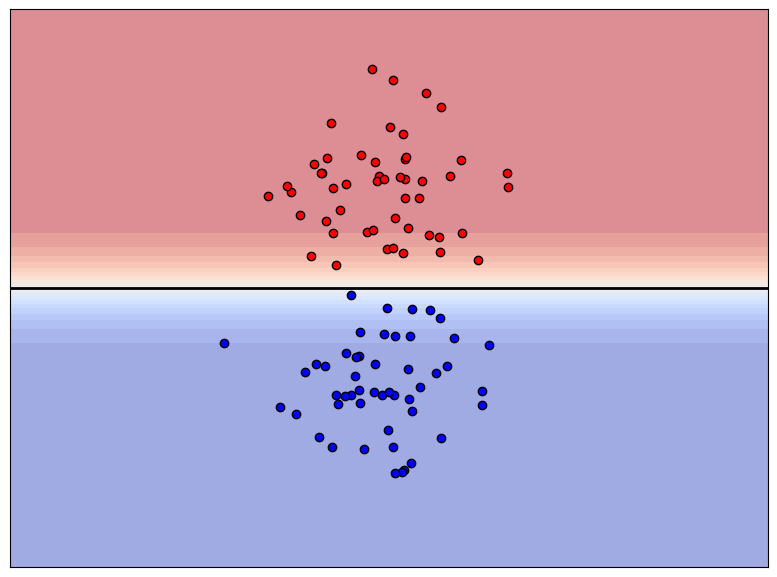

In [8]:
# --- Aleatoric Uncertainty ---
probs_aleatoric = predict_proba(true_a, true_b, true_c, grid)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(
    xx, yy, probs_aleatoric.reshape(xx.shape), levels=20, cmap="coolwarm", alpha=0.5
)
ax.contour(
    xx,
    yy,
    probs_aleatoric.reshape(xx.shape),
    levels=[0.5],
    colors="black",
    linewidths=2,
)

ax.scatter(class_A[:, 0], class_A[:, 1], c="blue", edgecolors="k", label="Class A")
ax.scatter(class_B[:, 0], class_B[:, 1], c="red", edgecolors="k", label="Class B")

if show_legend:
    ax.legend(loc="upper left")

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

ax.set_xticks([])
ax.set_yticks([])

# fig.colorbar(c, ax=ax, label='p(y=1)')
fig.tight_layout()

fig.savefig("../figures/uncertainty_types_explanation/aleatoric.png", dpi=300)

In [9]:
# --- Epistemic Uncertainty ---
num_samples = 1000
a_samples = np.random.normal(true_a, 1.0, size=num_samples)
b_samples = np.full(num_samples, true_b)  # b is fixed
c_samples = np.random.normal(true_c, 0.1, size=num_samples)

probs_samples = np.zeros((num_samples, len(grid)))

for i in range(num_samples):
    probs_samples[i] = predict_proba(a_samples[i], b_samples[i], c_samples[i], grid)

mean_probs = probs_samples.mean(axis=0)
std_probs = probs_samples.std(axis=0)

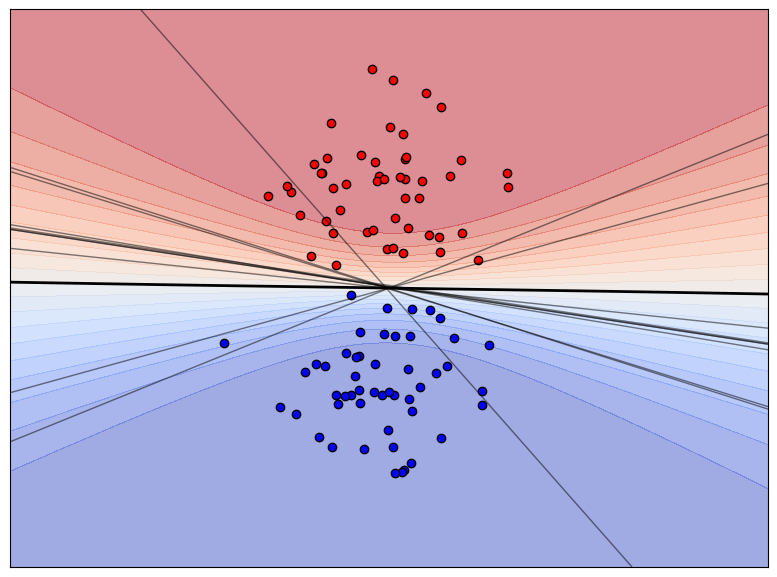

In [10]:
# --- Plot: Epistemic Uncertainty (Mean Prediction) ---
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(
    xx, yy, mean_probs.reshape(xx.shape), levels=20, cmap="coolwarm", alpha=0.5
)
ax.contour(
    xx, yy, mean_probs.reshape(xx.shape), levels=[0.5], colors="black", linewidths=2
)

for i in range(10):
    ax.contour(
        xx,
        yy,
        probs_samples[i].reshape(xx.shape),
        levels=[0.5],
        colors="black",
        linewidths=1,
        alpha=0.5,
    )

ax.scatter(class_A[:, 0], class_A[:, 1], c="blue", edgecolors="k", label="Class A")
ax.scatter(class_B[:, 0], class_B[:, 1], c="red", edgecolors="k", label="Class B")

if show_legend:
    ax.legend(loc="upper left")

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

ax.set_xticks([])
ax.set_yticks([])

# fig.colorbar(c, ax=ax, label='Mean p(y=1)')
fig.tight_layout()

fig.savefig("../figures/uncertainty_types_explanation/epistemic_mean.png", dpi=300)

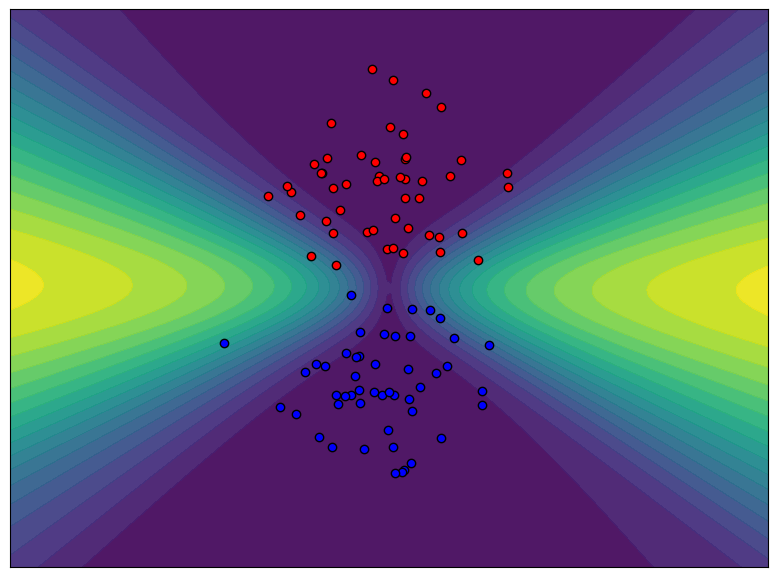

In [11]:
# --- Plot: Epistemic Uncertainty (Std of Predictions) ---
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(
    xx, yy, std_probs.reshape(xx.shape), levels=20, cmap="viridis", alpha=0.95
)

ax.scatter(class_A[:, 0], class_A[:, 1], c="blue", edgecolors="k", label="Class A")
ax.scatter(class_B[:, 0], class_B[:, 1], c="red", edgecolors="k", label="Class B")

if show_legend:
    ax.legend(loc="upper left")

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

ax.set_xticks([])
ax.set_yticks([])

# fig.colorbar(c, ax=ax, label='Std of p(y=1) across models')
fig.tight_layout()

fig.savefig("../figures/uncertainty_types_explanation/epistemic_std.png", dpi=300)

In [15]:
# Simulate a parameter range
theta = np.linspace(-3, 3, 400)

In [22]:
# Define a Gaussian posterior distribution (MAP estimate at theta = 0)
posterior_mean = 1.0
posterior_std = 0.8
posterior = (1 / (np.sqrt(2 * np.pi) * posterior_std)) * np.exp(-0.5 * ((theta - posterior_mean) / posterior_std) ** 2)

In [23]:
# Compute the negative log-posterior (i.e., the loss function)
loss = -np.log(posterior + 1e-12)

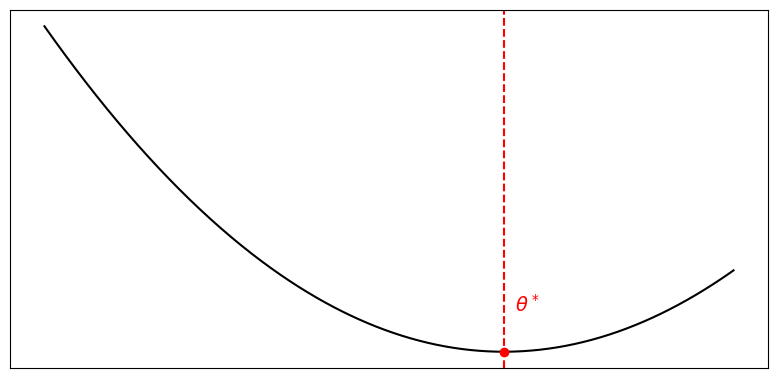

In [110]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(theta, loss, label='Negative Log Posterior (Loss)', color='black')

ax.axvline(posterior_mean, color='red', linestyle='--', label=r'Minimum Loss at $\theta^*$')
ax.scatter(posterior_mean, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))), color='red', zorder=5)
ax.text(posterior_mean + 0.1, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))) + 1.55, r'$\theta^*$', color='red')

# ax.set_xlabel('θ')
ax.set_xticks([])

# ax.set_ylabel('Loss')
ax.set_yticks([])

# ax.legend()

fig.tight_layout()

fig.savefig("../figures/loss_posterior/loss.png", dpi=300)

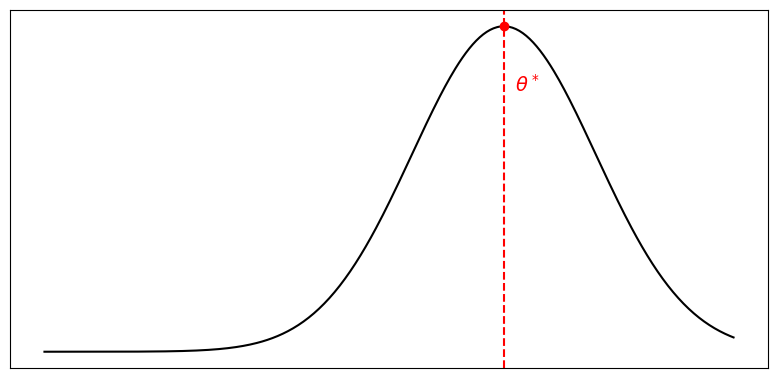

In [111]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(theta, posterior, label='Posterior Distribution', color='black')

ax.axvline(posterior_mean, color='red', linestyle='--', label=r'MAP Estimate $\theta^*$')
ax.scatter(posterior_mean, (1 / (np.sqrt(2 * np.pi) * posterior_std)), color='red', zorder=5)
ax.text(posterior_mean + 0.1, (1 / (np.sqrt(2 * np.pi) * posterior_std)) - 0.1, r'$\theta^*$', color='red')

# ax.set_xlabel('θ')
ax.set_xticks([])

# ax.set_ylabel('Loss')
ax.set_yticks([])

# ax.legend()

fig.tight_layout()

fig.savefig("../figures/loss_posterior/map.png", dpi=300)

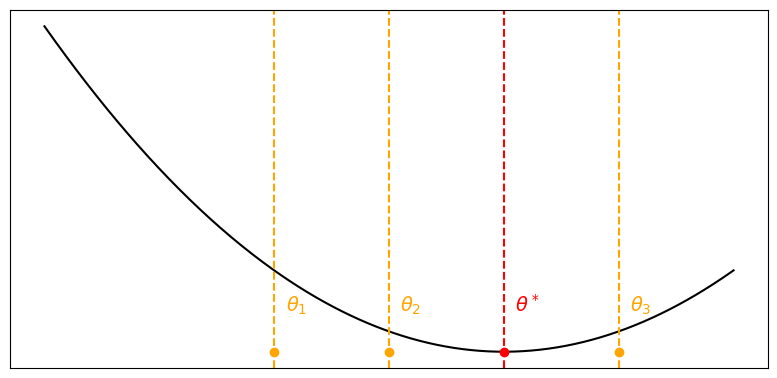

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(theta, loss, label='Negative Log Posterior (Loss)', color='black')

ax.axvline(posterior_mean, color='red', linestyle='--', label=r'Minimum Loss at $\theta^*$')
ax.scatter(posterior_mean, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))), color='red', zorder=5)
ax.text(posterior_mean + 0.1, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))) + 1.55, r'$\theta^*$', color='red')

candidates = [-1, 0, 2]
for i, candidate in enumerate(candidates):
    ax.axvline(candidate, color='orange', linestyle='--', label=fr'Candidate $\theta_{i+1}$')
    ax.scatter(candidate, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))), color='orange', zorder=5)
    ax.text(candidate + 0.1, -np.log((1 / (np.sqrt(2 * np.pi) * posterior_std))) + 1.55, fr'$\theta_{i+1}$', color='orange')

# ax.set_xlabel('θ')
ax.set_xticks([])

# ax.set_ylabel('Loss')
ax.set_yticks([])

# ax.legend()

fig.tight_layout()

fig.savefig("../figures/loss_posterior/loss_candidates.png", dpi=300)

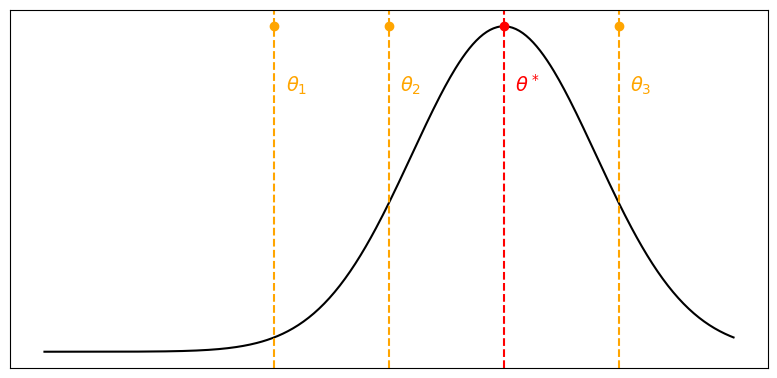

In [113]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(theta, posterior, label='Posterior Distribution', color='black')

ax.axvline(posterior_mean, color='red', linestyle='--', label=r'MAP Estimate $\theta^*$')
ax.scatter(posterior_mean, (1 / (np.sqrt(2 * np.pi) * posterior_std)), color='red', zorder=5)
ax.text(posterior_mean + 0.1, (1 / (np.sqrt(2 * np.pi) * posterior_std)) - 0.1, r'$\theta^*$', color='red')

candidates = [-1, 0, 2]
for i, candidate in enumerate(candidates):
    ax.axvline(candidate, color='orange', linestyle='--', label=fr'Candidate $\theta_{i+1}$')
    ax.scatter(candidate, (1 / (np.sqrt(2 * np.pi) * posterior_std)), color='orange', zorder=5)
    ax.text(candidate + 0.1, (1 / (np.sqrt(2 * np.pi) * posterior_std)) - 0.1, fr'$\theta_{i+1}$', color='orange')

# ax.set_xlabel('θ')
ax.set_xticks([])

# ax.set_ylabel('Loss')
ax.set_yticks([])

# ax.legend()

fig.tight_layout()

fig.savefig("../figures/loss_posterior/map_candidates.png", dpi=300)